In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set the seaborn style
sns.set_theme(style="whitegrid")

In [15]:
# Load the dataset

data = pd.read_csv("result.csv")
data["msg_rate_(msg/s)"] = data["Total_Messages_Received"] / 60.0
data.head()

# save the data to a csv file
data.to_csv("result_2.csv", index=False)


/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


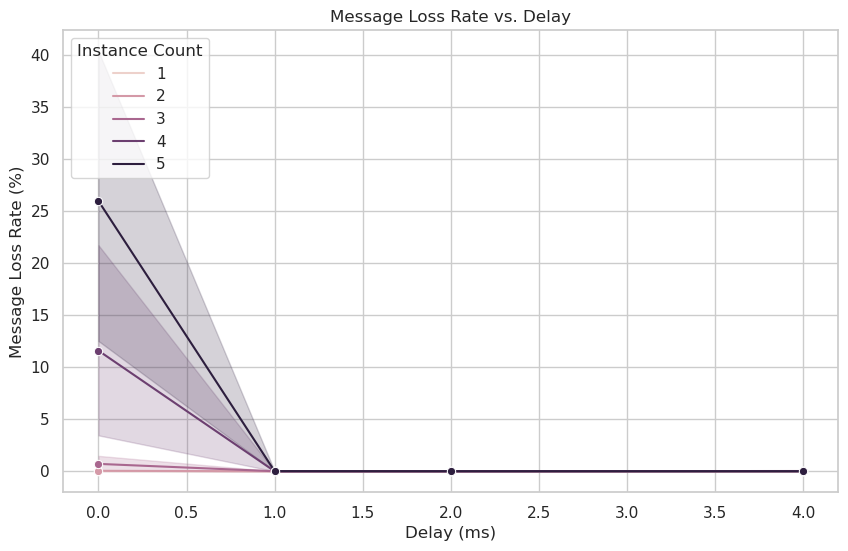

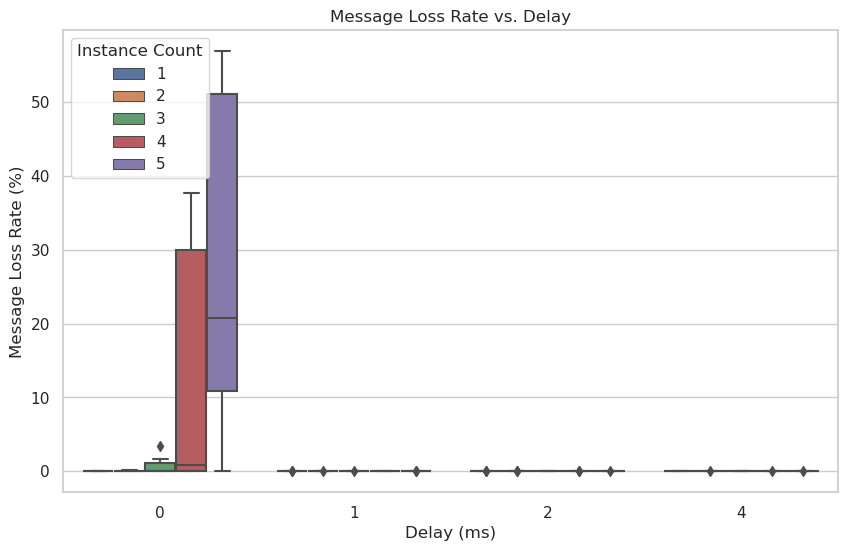

In [6]:
# Message Loss Rate vs. Delay


# Plot Message Loss Rate vs. Delay
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Delay_(ms)', y='Message_Loss_Rate_(%)', hue='Instance_Count', marker='o')

# Adding title and labels
plt.title('Message Loss Rate vs. Delay')
plt.xlabel('Delay (ms)')
plt.ylabel('Message Loss Rate (%)')
plt.legend(title='Instance Count', loc='upper left')

# Show the plot
plt.show()

# Plot Message Loss Rate vs. Delay
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Delay_(ms)', y='Message_Loss_Rate_(%)', hue='Instance_Count')

# Adding title and labels
plt.title('Message Loss Rate vs. Delay')
plt.xlabel('Delay (ms)')
plt.ylabel('Message Loss Rate (%)')
plt.legend(title='Instance Count', loc='upper left')

# Show the plot
plt.show()

/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


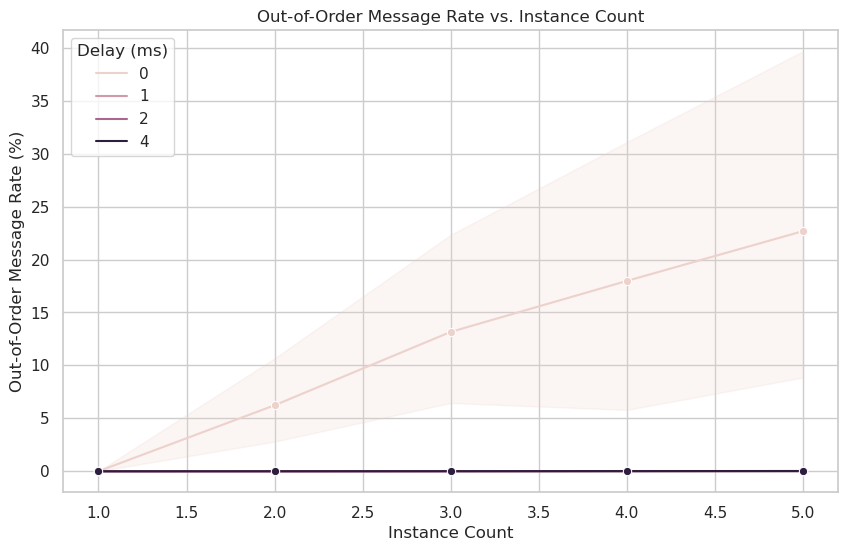

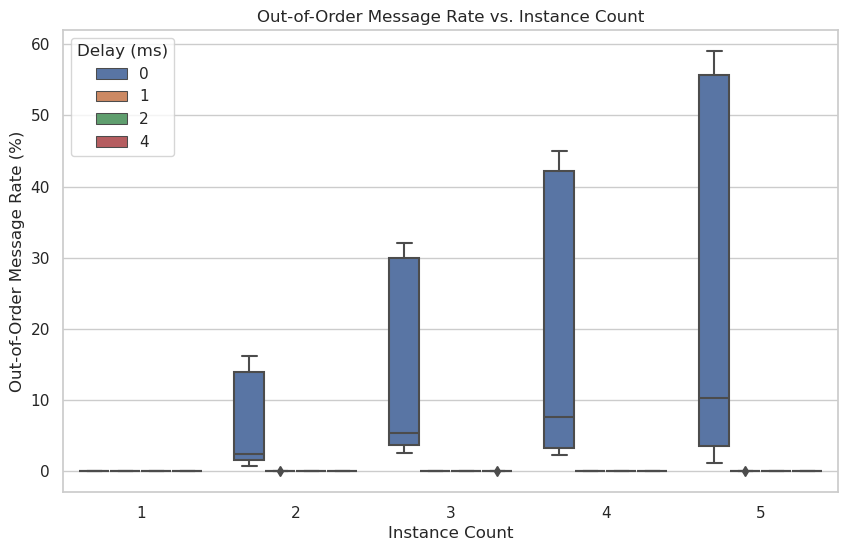

In [7]:
# Out-of-Order Message Rate vs. Instance Count


# Plot Out-of-Order Message Rate vs. Instance Count
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Instance_Count', y='Out_of_Order_Message_Rate_(%)', hue='Delay_(ms)', marker='o')

# Adding title and labels
plt.title('Out-of-Order Message Rate vs. Instance Count')
plt.xlabel('Instance Count')
plt.ylabel('Out-of-Order Message Rate (%)')
plt.legend(title='Delay (ms)', loc='upper left')

# Show the plot
plt.show()

# Plot Out-of-Order Message Rate vs. Instance Count
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Instance_Count', y='Out_of_Order_Message_Rate_(%)', hue='Delay_(ms)')

# Adding title and labels
plt.title('Out-of-Order Message Rate vs. Instance Count')
plt.xlabel('Instance Count')
plt.ylabel('Out-of-Order Message Rate (%)')
plt.legend(title='Delay (ms)', loc='upper left')

# Show the plot
plt.show()

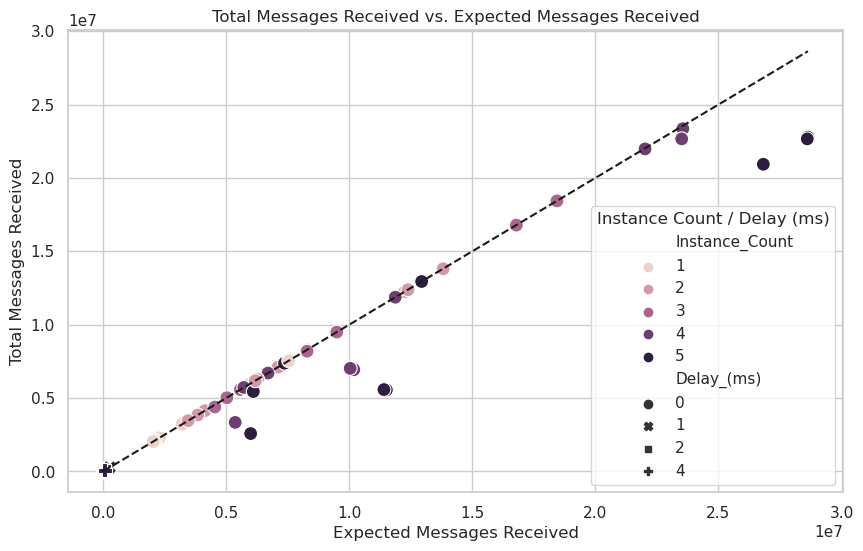

In [8]:
# Total Messages Received vs. Expected Messages Received

# Scatter plot of Total Messages Received vs. Expected Messages Received
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Expected_Messages_Received', y='Total_Messages_Received', hue='Instance_Count', style='Delay_(ms)', s=100)

# Adding title and labels
plt.title('Total Messages Received vs. Expected Messages Received')
plt.xlabel('Expected Messages Received')
plt.ylabel('Total Messages Received')
plt.legend(title='Instance Count / Delay (ms)', loc='lower right')

# Plot a reference line (y=x)
plt.plot([data['Expected_Messages_Received'].min(), data['Expected_Messages_Received'].max()],
         [data['Expected_Messages_Received'].min(), data['Expected_Messages_Received'].max()], 'k--')

# Show the plot
plt.show()

/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


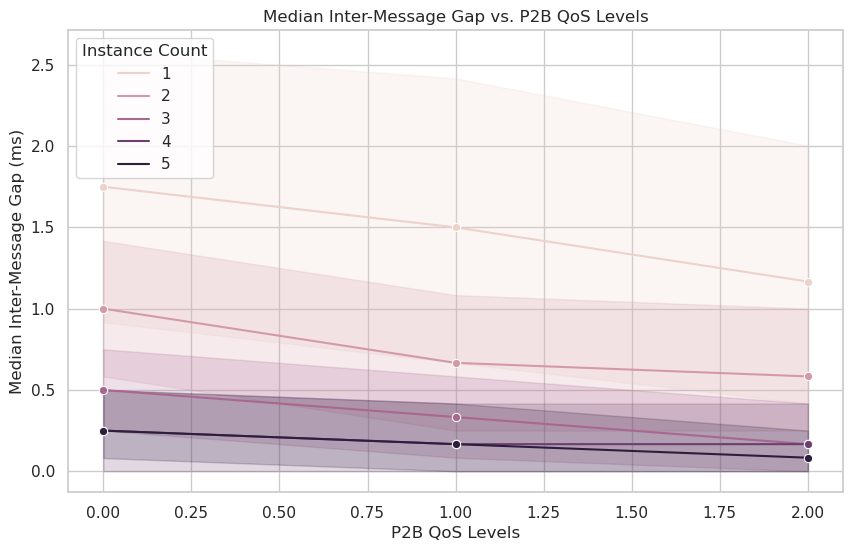

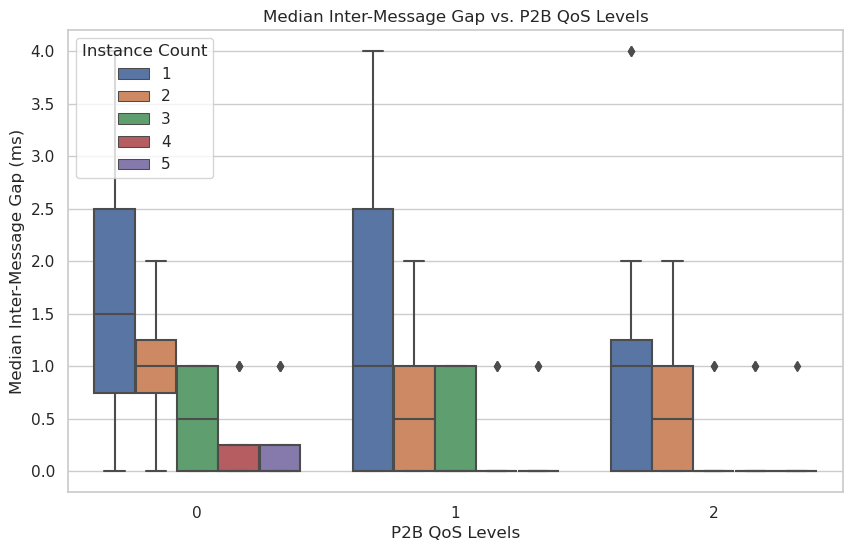

In [9]:
# Median Inter-Message Gap vs. QoS Levels

# Plot Median Inter-Message Gap vs. QoS Levels
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='P2B_QoS', y='Median_Inter_Message_Gap_(ms)', hue='Instance_Count', marker='o')

# Adding title and labels
plt.title('Median Inter-Message Gap vs. P2B QoS Levels')
plt.xlabel('P2B QoS Levels')
plt.ylabel('Median Inter-Message Gap (ms)')
plt.legend(title='Instance Count', loc='upper left')

# Show the plot
plt.show()

# Plot Median Inter-Message Gap vs. QoS Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='P2B_QoS', y='Median_Inter_Message_Gap_(ms)', hue='Instance_Count')

# Adding title and labels
plt.title('Median Inter-Message Gap vs. P2B QoS Levels')
plt.xlabel('P2B QoS Levels')
plt.ylabel('Median Inter-Message Gap (ms)')
plt.legend(title='Instance Count', loc='upper left')

# Show the plot
plt.show()

/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

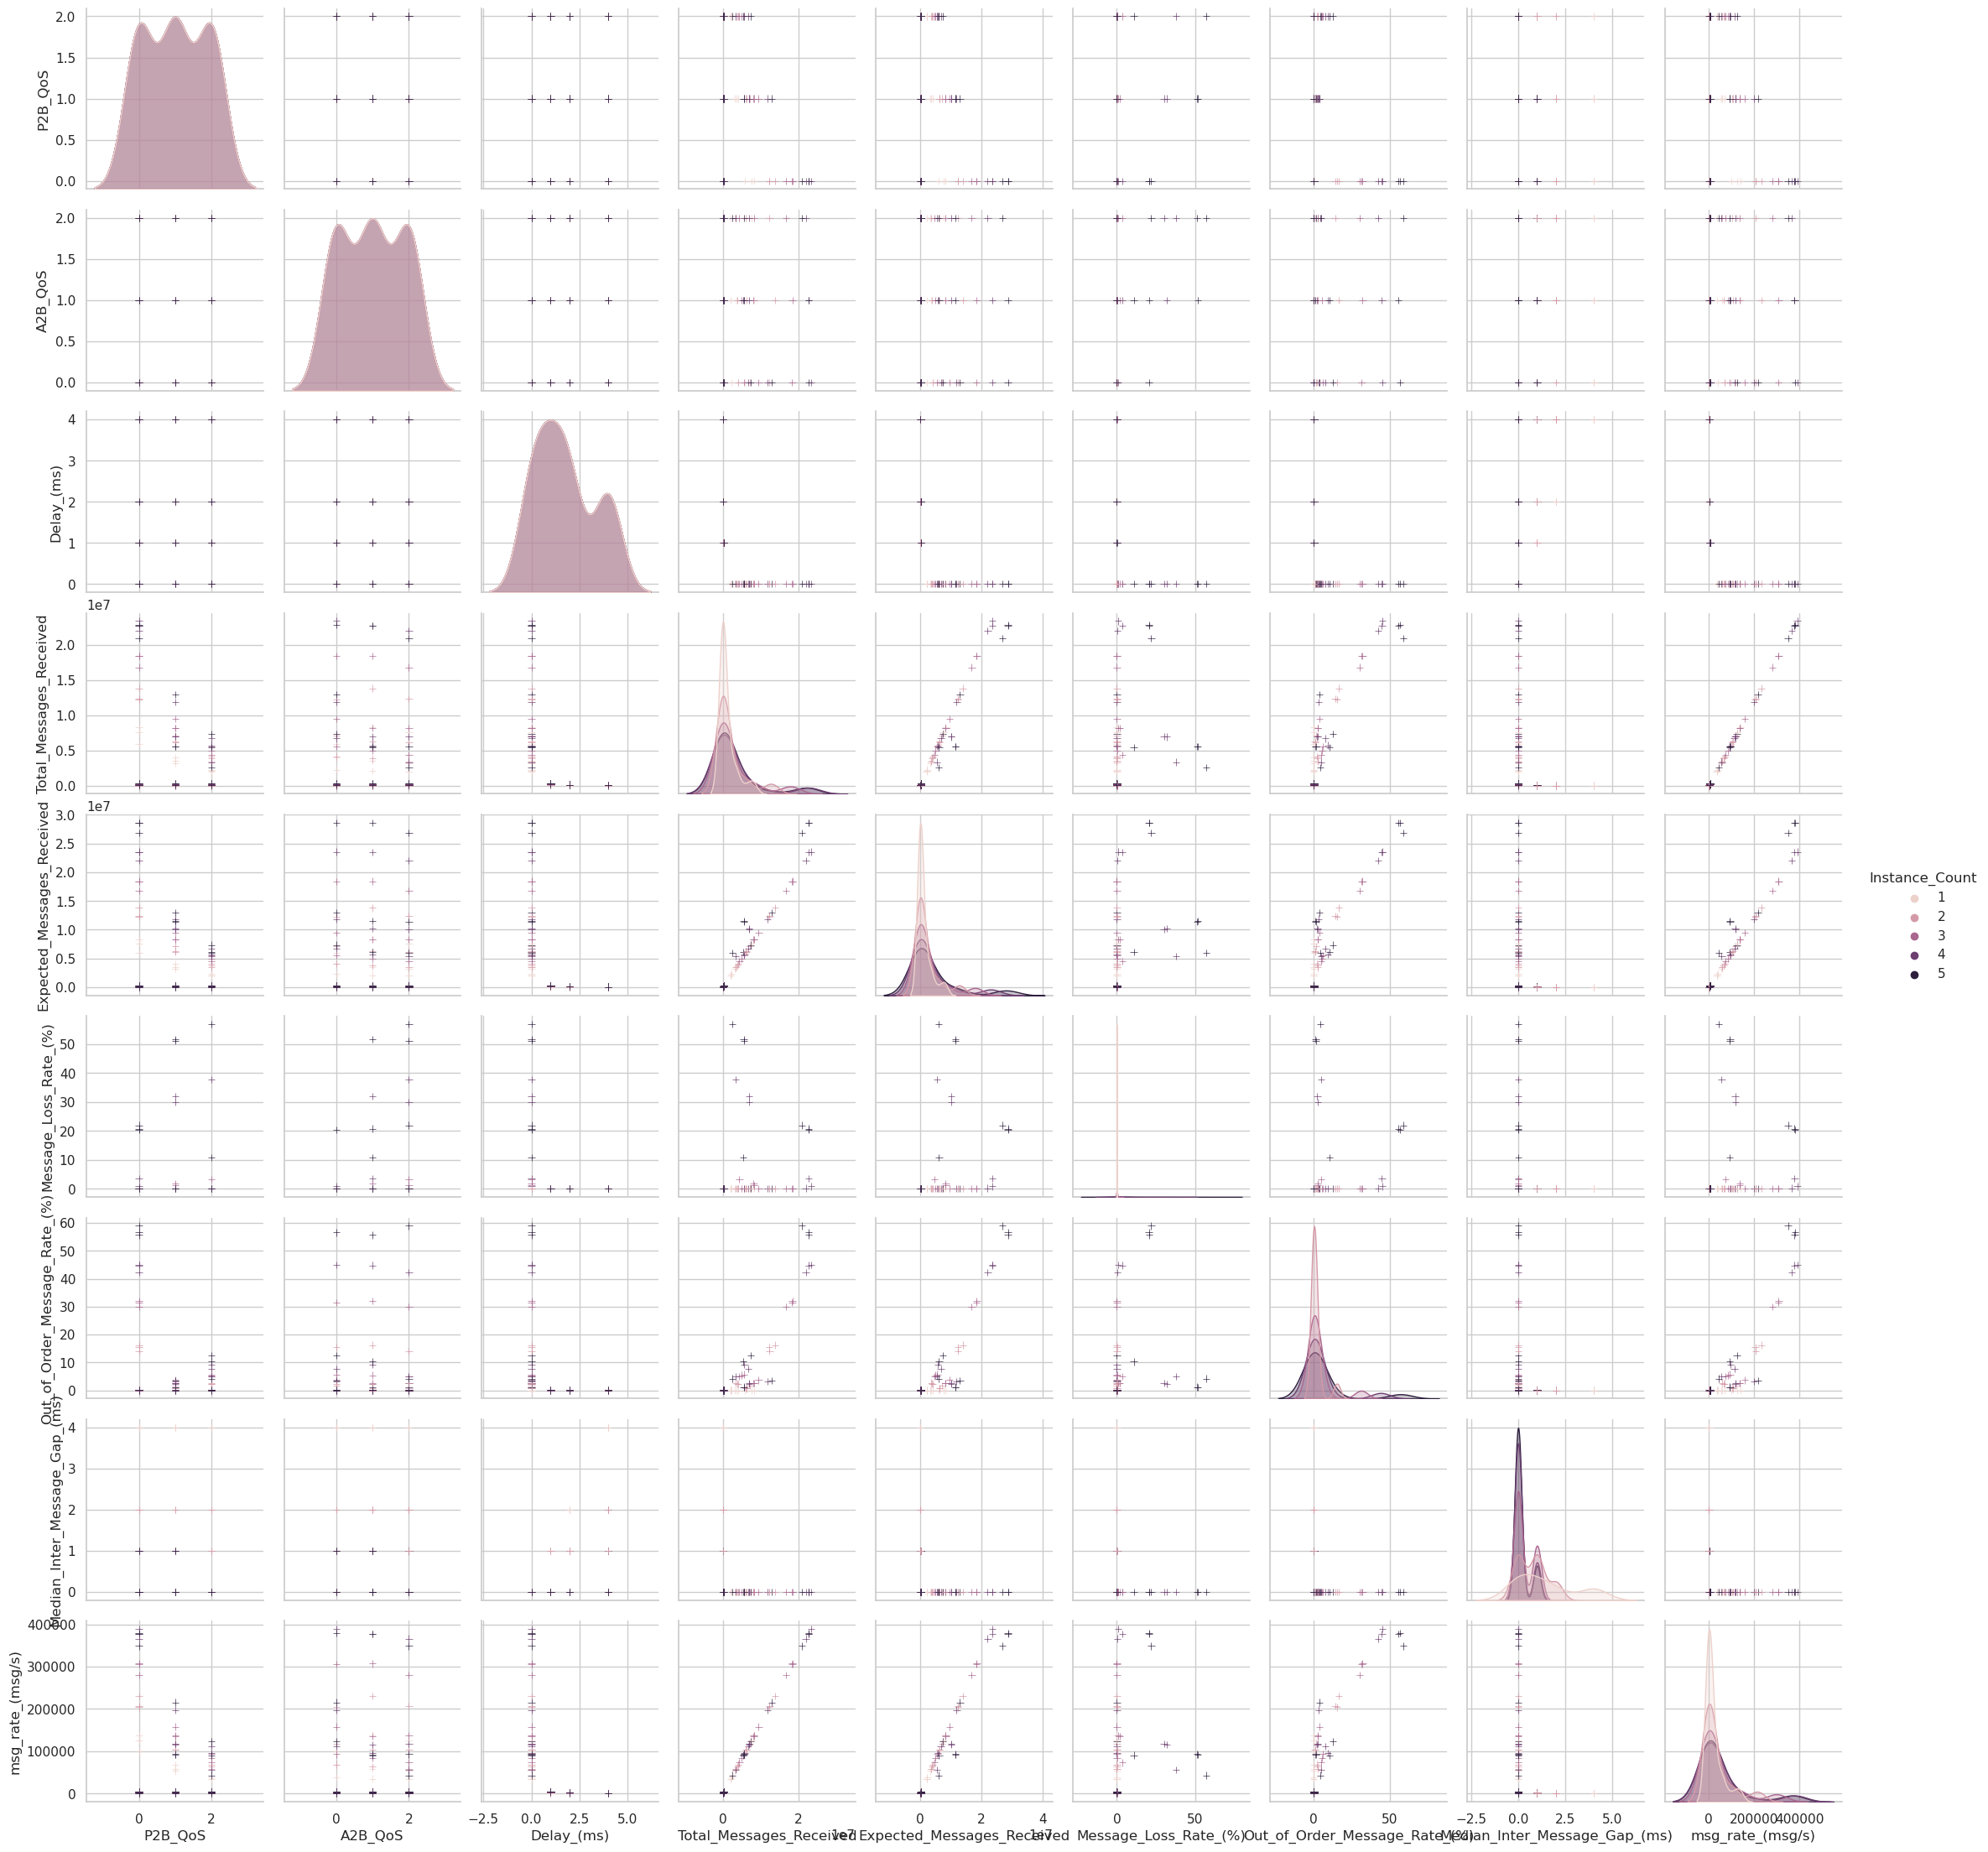

In [10]:
# Pairplot for exploratory data analysis
sns.pairplot(data, hue='Instance_Count', diag_kind='kde', markers='+')

# Show the plot
plt.show()